In [23]:
# 실습용 데이터 패키지
from sklearn.datasets import load_breast_cancer

# 데이터 전처리 패키지
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델 구축 및 평가 패키지
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [24]:
import matplotlib as mp
font_dirs = './'
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)
plt.rc('font', family='NanumGothic')

mp.rcParams['font.size'] = 15
mp.rcParams['axes.unicode_minus'] = False

In [25]:
breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [26]:
# X 변수 및 Y 변수 확인
print(breast_cancer.feature_names)
print(breast_cancer.target_names) ## class {"0":'malignant',"1":"benign"}

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


### 양성인 경우가 1인 것이 계산하기 편리하므로 유방암인 경우 1, 아닌 경우 0으로 바꾼다.
###
### np.where(확인할 조건, 참인 경우 할당하는 값, 거짓인 경우 할당하는 값)

In [27]:
# P(Y=1) : 유방암일 확률 , P(Y=0) : 유방암이 아닐 확률 && class {"1":'malignant',"0":"benign"}
breast_cancer.target = np.where(breast_cancer.target==0,1,0) ## np.where() 조건문

In [28]:
# Train set/ Test set 나누기
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data,
                                                   breast_cancer.target,
                                                   test_size=0.3,
                                                   random_state=2021)
# 데이터 컬럼 단위 정규화 하기
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

## Learning

In [29]:
# model 불러오기
model = LogisticRegression()

# model 학습시키기
model.fit(X_train, y_train)

LogisticRegression()

## $\beta$ 값 해석

In [30]:
# 데이터 컬럼에 따른 beta, exp(beta) 체크
column_name = ["const"] + breast_cancer.feature_names.tolist()
beta = np.concatenate([model.intercept_,model.coef_.reshape(-1)]).round(2) # round(2) 소수점 둘째짜리까지 반올림
odds = np.exp(beta).round(2) # round(2) 소수점 둘째짜리까지 반올림
interpret = np.where(beta>0,'risky','protective') # np.where() 조건문 

# beta 해석 정리
beta_analysis = pd.DataFrame(np.c_[beta,odds,interpret],index=column_name,columns=['beta','exp(beta)','interpret'])
beta_analysis

,beta,exp(beta),interpret
const,-0.42,0.66,protective
mean radius,0.55,1.73,risky
mean texture,0.93,2.53,risky
mean perimeter,0.55,1.73,risky
mean area,0.56,1.75,risky
mean smoothness,0.14,1.15,risky
mean compactness,-0.48,0.62,protective
mean concavity,0.92,2.51,risky
mean concave points,0.73,2.08,risky
mean symmetry,0.24,1.27,risky


## Test data 예측하기

In [32]:
# X_test에 대한 P(Y=0) 예측 확률값과 P(Y=1) 예측 확률값 - 패키지 이용
model.predict_proba(X_test)[:5]

array([[9.99580975e-01, 4.19024676e-04],
       [9.99985746e-01, 1.42539725e-05],
       [9.92734002e-01, 7.26599785e-03],
       [2.67563749e-13, 1.00000000e+00],
       [9.99986508e-01, 1.34923124e-05]])

In [33]:
# X_test에 대한 P(Y=0) 예측 확률값과 P(Y=1) 예측 확률값 - 직접 계산

## beta 곱하기 X 계산
Xbeta = np.matmul(np.c_[np.ones(X_test.shape[0]),X_test],beta.reshape(-1,1))
## P(Y=1) 계산
P_1 = 1 / (1+np.exp(-Xbeta))

## 패키지와 직접 계산 결과 비교
pd.DataFrame(np.concatenate([P_1,model.predict_proba(X_test)[:,1].reshape(-1,1)],
                            axis=1),columns=['직접','패키지'])

,직접,패키지
0,0.000421,0.000419
1,0.000014,0.000014
2,0.007349,0.007266
3,1.000000,1.000000
4,0.000013,0.000013
...,...,...
166,0.000219,0.000222
167,0.000090,0.000090
168,0.008998,0.008903
169,0.168818,0.166300


## 예측 성능 평가

In [34]:
Cut_off = np.linspace(0.0000001,0.99,10) ## cut off 값 여러개 만들어두기
for cutoff in Cut_off:
    y_pred = np.where(P_1.reshape(-1)>=cutoff,1,0) # 확률값이 cuf off보다 크면 1(유방암), 아니면 0(유방암x)
    acc = accuracy_score(y_true = y_test, y_pred =y_pred) ## 정확도
    recall = recall_score(y_true = y_test, y_pred =y_pred) ## 민감도
    precision = precision_score(y_true = y_test, y_pred =y_pred) ## 정밀도
    
    print(f"정확도:{acc:0.2f}",f"민감도:{recall:0.2f}",f"정밀도:{precision:0.2f}",f"cut off:{cutoff:0.2f}", sep='  |  ')  

정확도:0.38  |  민감도:1.00  |  정밀도:0.38  |  cut off:0.00
정확도:0.94  |  민감도:0.97  |  정밀도:0.87  |  cut off:0.11
정확도:0.95  |  민감도:0.97  |  정밀도:0.91  |  cut off:0.22
정확도:0.96  |  민감도:0.95  |  정밀도:0.94  |  cut off:0.33
정확도:0.96  |  민감도:0.94  |  정밀도:0.95  |  cut off:0.44
정확도:0.97  |  민감도:0.94  |  정밀도:0.98  |  cut off:0.55
정확도:0.96  |  민감도:0.92  |  정밀도:0.98  |  cut off:0.66
정확도:0.96  |  민감도:0.91  |  정밀도:1.00  |  cut off:0.77
정확도:0.95  |  민감도:0.88  |  정밀도:1.00  |  cut off:0.88
정확도:0.92  |  민감도:0.78  |  정밀도:1.00  |  cut off:0.99


## Roc curve

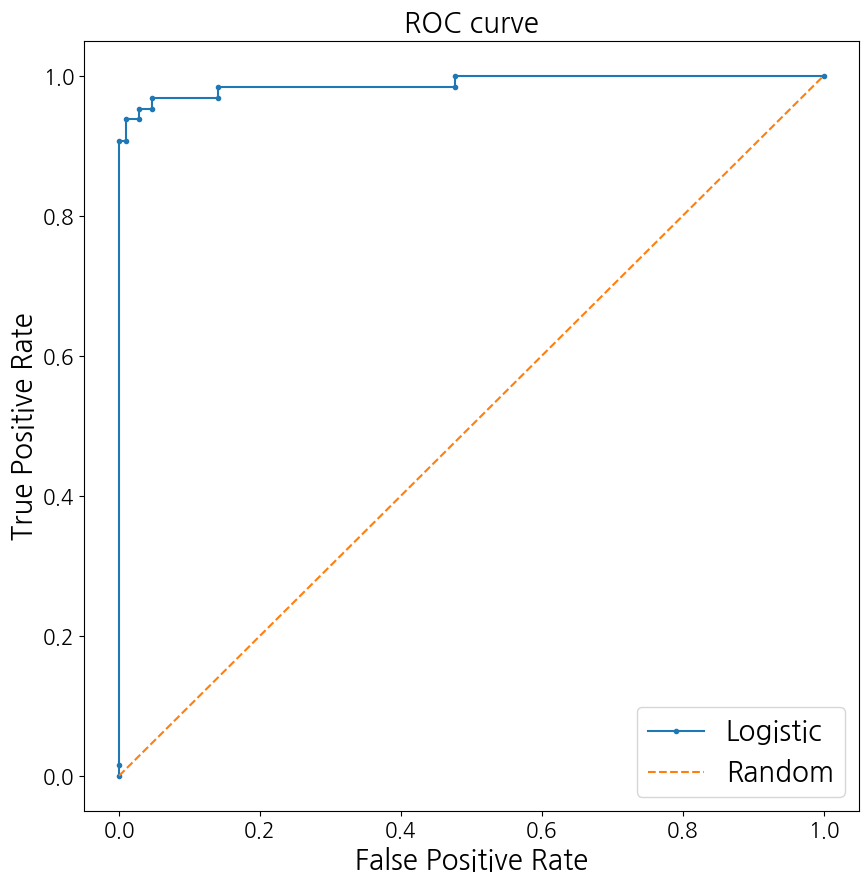

In [35]:
# X_test에 대한 P(Y=1) 예측 확률값 - 패키지 이용
probs = model.predict_proba(X_test)[:, 1] ## [:,1]은 두번째 컬럼을 indexing 한다는 뜻
 
# Roc curve X 축, Y축 추출
model_fpr, model_tpr, threshold1 = roc_curve(y_test, probs)
random_fpr, random_tpr, threshold2 = roc_curve(y_test, [0 for i in range(X_test.__len__())])

# plot the roc curve for the model and random
plt.figure(figsize=(10,10))
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')

# axis labels
plt.xlabel('False Positive Rate',size=20)
plt.ylabel('True Positive Rate',size=20)
 
# show the legend
plt.legend(fontsize=20)
 
# show the plot
plt.title("ROC curve",size=20)
plt.show()